**This is my 2nd Kernel and is kind of version 2 to my previous kernel which can be found here**

(http://www.kaggle.com/rp1611/step-by-step-guide-to-leader-board-top-10) 

Along with all usual visualization, I have used Keras to build a simple NN model. I am just providing you a platform which you can finetune to get better results with NN.

All the existing variables along with feature engineered once are available in combined data. Use the notebook to finetune your model by adding/dropping/modifying the existing features. 

**If you like this notebook or find this notebook helpful, Please upvote and/or leave a comment**

**What would be the workflow?**

I will keep it simple & crisp rather than using buzz words & useless data science frameworks. Frankly speaking no one cares. 

This will help you to stay on track. So here is the workflow.

**1. Problem Identification**

**2. What data do we have?**

**3. Exploratory data analysis**

**4. Data preparation including feature engineering**

**5. Developing a Neural Network model**

**6. Predict using Neural Network**

**7. Conclusions**

That's all you need to solve a data science problem.

**Problem Identification** 

**Best Practice -** The most important part of any project is correct problem identification. Before you jump to "How to do this" part like typical Data Scientists, understand "What/Why" part.  
Understand the problem first and draft a rough strategy on a piece of paper to start with. Write down things like what are you expected to do & what data you might need or let's say what all algorithms you plan to use. 

Now the <a href="https://www.kaggle.com/c/titanic/"> Titanic challenge</a>  hosted by Kaggle is a competition in which the goal is to predict the survival or the death of a given passenger based on a set of variables describing  age, sex, or passenger's class on the boat.

![](http://www.tyro.com/content/uploads/2016/04/blog-twenty-one-business-icebergs-sink-business-280416.jpg)

So it is a classification problem and you are expected to predict Survived as 1 and Died as 0.

**2. What data do we have?**


Let's import necessary libraries & bring in the datasets in Python environment first. Once we have the datasets in Python environment we can slice & dice the data to understand what we have and what is missing.

In [1]:
# Import the python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
get_ipython().run_line_magic('matplotlib', 'inline')
sns.set(style='white', context='notebook', palette='deep')
import warnings
warnings.filterwarnings('ignore')

# Read the datasets
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
IDtest = pd.DataFrame(test["PassengerId"])

In [2]:
train.info() # We have 891 observations & 12 columns. See the mix of variable types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
train.head(5) # Ticket & Cabin variables are alphanumeric

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.info() # We have 417 observations & 11 columns (no response 'Survived' column).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**3. Exploratory data analysis **

One important aspect of machine learning is to ensure that the variables show almost the same trend across train & test data. If not, it would lead to overfitting because model is representing a relationship which is not applicable in the test dataset. 

I will give you one example here. As we do variable analysis, try to replicate (wherever applicable) the code for test data and see if there is any major difference in data distribution. 

**Example** - Let's start with finding the number of missing values. If you compare the output you will see that missing value percentages do not vary much across train & test datasets.

Use the groupby/univariate/bivariate analysis method to compare the distribution across Train & Test data

In [5]:
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
miss_train = pd.DataFrame({'Train Missing Ratio' :train_na})
miss_train.head()

,Train Missing Ratio
Cabin,77.104377
Age,19.865320
Embarked,0.224467


In [6]:
test_na = (test.isnull().sum() / len(test)) * 100
test_na = test_na.drop(test_na[test_na == 0].index).sort_values(ascending=False)[:30]
miss_test = pd.DataFrame({'Test Missing Ratio' :test_na})
miss_test.head()

,Test Missing Ratio
Cabin,78.229665
Age,20.574163
Fare,0.239234


In [7]:
# Fill empty and NaNs values with NaN
train = train.fillna(np.nan)
test = test.fillna(np.nan)

**PassengerId**

Not relevant from modeling perspective so we will drop this variable later

**Pclass**

Pclass is categorical variable. Let's look at the distribution.

,Survived
Pclass,
3,491
1,216
2,184


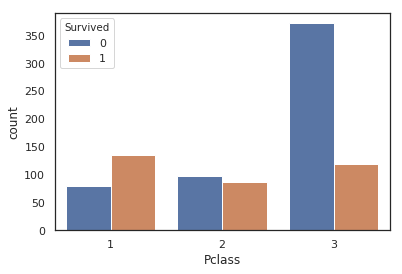

In [8]:
# Analyze the count of survivors by Pclass

ax = sns.countplot(x="Pclass", hue="Survived", data=train)
train[['Pclass', 'Survived']].groupby(['Pclass']).count().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


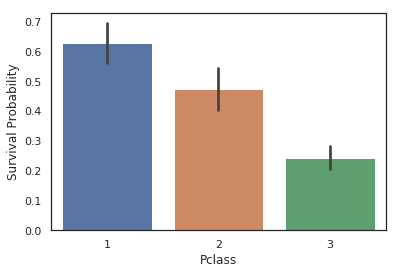

In [9]:
# Analyze the Survival Probability by Pclass

g = sns.barplot(x="Pclass",y="Survived",data=train)
g = g.set_ylabel("Survival Probability")
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

Approximately 62% of Pclass = 1 passenger survived followed by 47% of Pclass2.

**Name**

Not relevant from analysis & modeling perspective. We will drop this feature later after creating a new variable as Title.

**Sex**

Based on analysis below, female had better chances of survival. 

![](https://www.ajc.com/rf/image_large/Pub/p9/AJC/2018/07/12/Images/newsEngin.22048809_071418-titanic_Titanic-Image-7--2-.jpg)

,Survived
Sex,
male,577
female,314


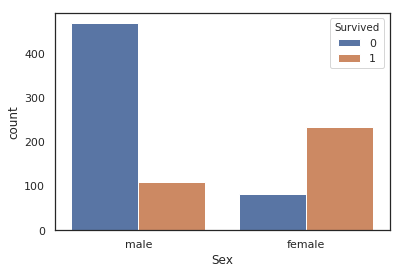

In [10]:
# Count the number of passengers by gender
ax = sns.countplot(x="Sex", hue="Survived", data=train)

# Analyze survival count by gender
train[["Sex", "Survived"]].groupby(['Sex']).count().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


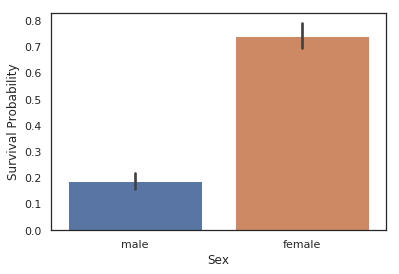

In [11]:
# Analyze the Survival Probability by Gender

g = sns.barplot(x="Sex",y="Survived",data=train)
g = g.set_ylabel("Survival Probability")
train[["Sex", "Survived"]].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

Based on data above, female passengers had better chances of survival than male passengers

**Age**

The insight below connects back to "Ladies and Kids First" scene of the movie. It shows that a good number of babies & young kids survived.

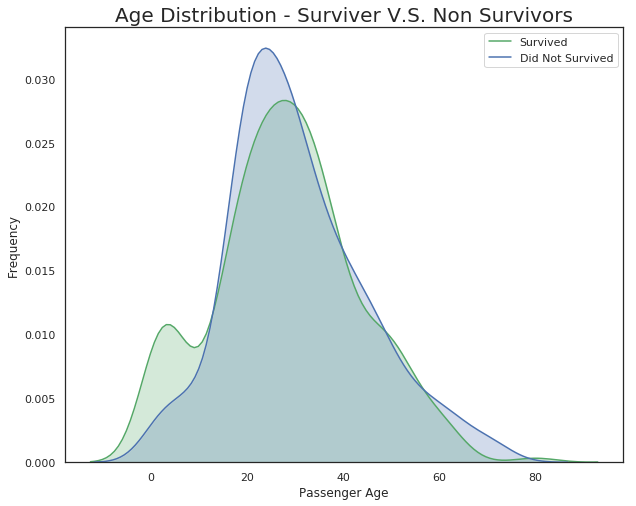

In [12]:
# Let's explore the distribution of age by response variable (Survived)
fig = plt.figure(figsize=(10,8),)
axis = sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='Survived')
axis = sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='b',shade=True,label='Did Not Survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 20)
plt.xlabel("Passenger Age", fontsize = 12)
plt.ylabel('Frequency', fontsize = 12);

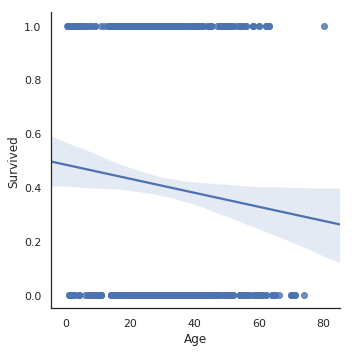

In [13]:
sns.lmplot('Age','Survived',data=train)

# We can also say that the older the passenger the lesser the chance of survival

**SibSP**

This variable refers to number of siblings/spouse onboard. SibSP = 1 and SibSP = 2 shows higher chances of survival.

,Survived
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


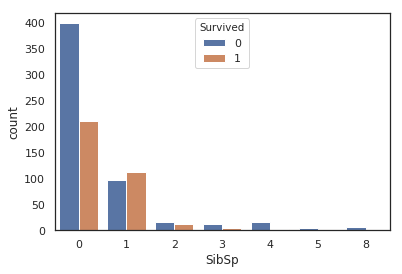

In [14]:
# Analyze the count of survivors by SibSP

ax = sns.countplot(x="SibSp", hue="Survived", data=train)
train[['SibSp', 'Survived']].groupby(['SibSp']).count().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


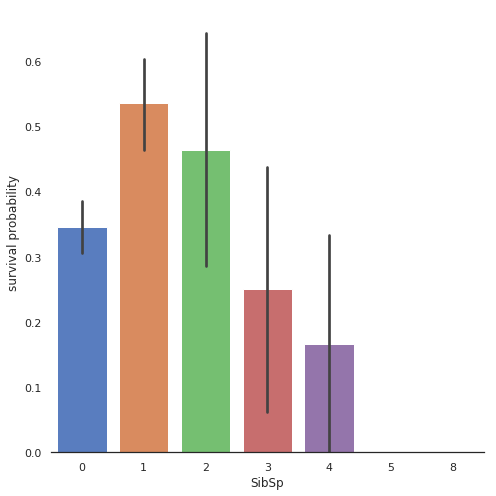

In [15]:
# Analyze probability of survival by SibSP

g  = sns.factorplot(x="SibSp",y="Survived",data=train,kind="bar", size = 7 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")
train[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

**Parch**

Parch indicates number of parents / children aboard the Titanic. Note that Parch = 3 and Parch = 1 shows higher survival probabilities. 

,Survived
Parch,
0,678
1,118
2,80
3,5
5,5
4,4
6,1


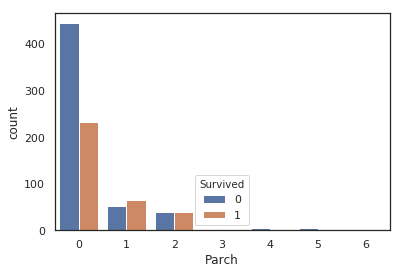

In [16]:
# Analyze the count of survivors by Parch

ax = sns.countplot(x="Parch", hue="Survived", data=train)
train[['Parch', 'Survived']].groupby(['Parch']).count().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


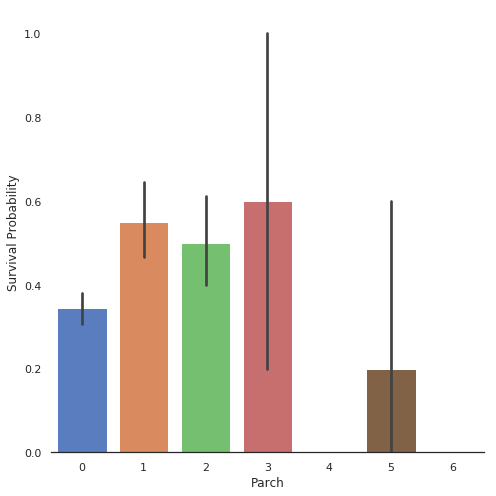

In [17]:
# Analyze the Survival Probability by Parch

g  = sns.factorplot(x="Parch",y="Survived",data=train,kind="bar", size = 7 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")
train[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

**Ticket**

This variable has alphanumeric value which might not be related to Survival directly but we can use this variable to create some additional features.

In [18]:
train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

**Fare**

Let's check the distribution first.


 mu = 32.20 and sigma = 49.67



Text(0.5,1,'Fare distribution')

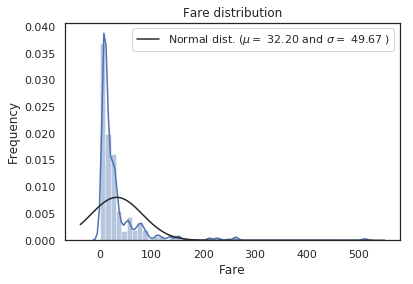

In [19]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
sns.distplot(train['Fare'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Fare'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
           loc='best')
plt.ylabel('Frequency')
plt.title('Fare distribution')

The Fare variable is right skewed. We need to transform this variable using log function and make it more normally distributed. We will do this during feature engineering process.

**Cabin**

Alphanumeric variable. 

687 missing values in train & 327 missing values in test data - which needs to be treated. We can create more features using this Cabin variable. 

In [20]:
# Let's check the unique values
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

**Embarked**

C = Cherbourg, Q = Queenstown, S = Southampton

Let's explore the variable with Survival rate. Embarked represents port of embarkation. As the analysis output below suggests Emabrked C shows high probabilities of survival.

,Survived
Embarked,
S,644
C,168
Q,77


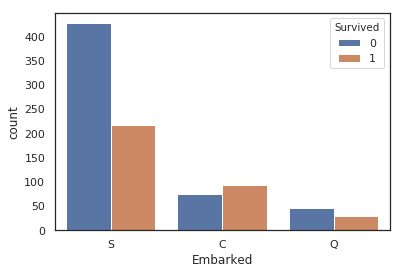

In [21]:
# Analyze the count of survivors by Embarked variable

ax = sns.countplot(x="Embarked", hue="Survived", data=train)
train[['Embarked', 'Survived']].groupby(['Embarked']).count().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


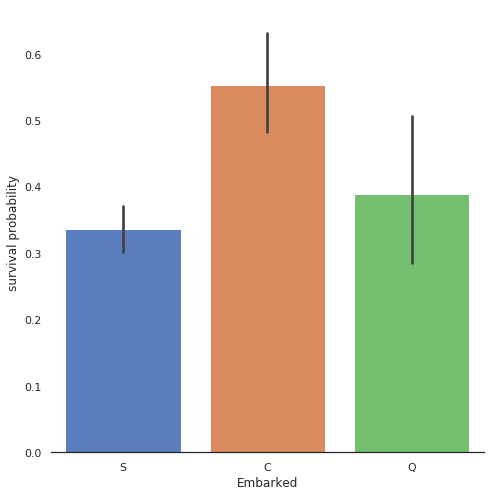

In [22]:
# Analyze the Survival Probability by Embarked

g  = sns.factorplot(x="Embarked",y="Survived",data=train,kind="bar", size = 7 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")
train[["Embarked", "Survived"]].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False)

**Additional analysis**

Let's create few additional charts to see how different variables are related.

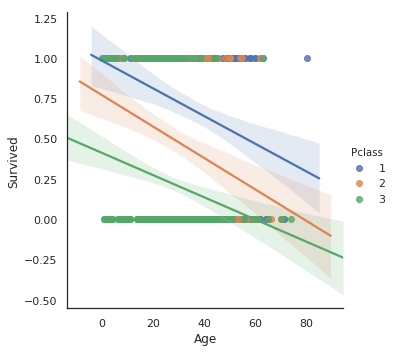

In [23]:
# Age, Pclass & Survival
sns.lmplot('Age','Survived',data=train,hue='Pclass')

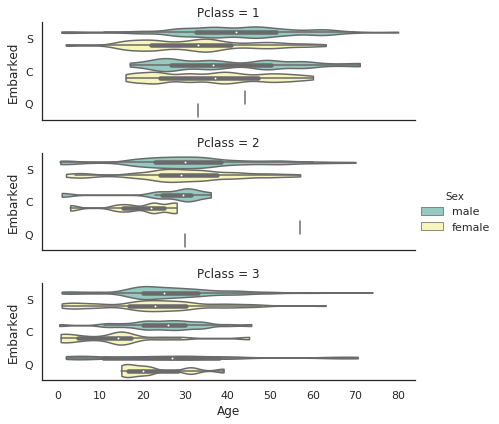

In [24]:
# Age, Embarked, Sex, Pclass
g = sns.catplot(x="Age", y="Embarked",  hue="Sex", row="Pclass",   data=train[train.Embarked.notnull()], 
orient="h", height=2, aspect=3, palette="Set3",  kind="violin", dodge=True, cut=0, bw=.2)

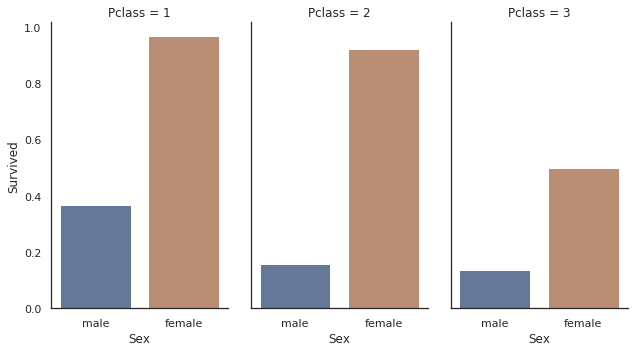

In [25]:
# Relation among Pclass, Gender & Survival Rate
g = sns.catplot(x="Sex", y="Survived", col="Pclass", data=train, saturation=.5, 
                kind="bar", ci=None, aspect=.6)

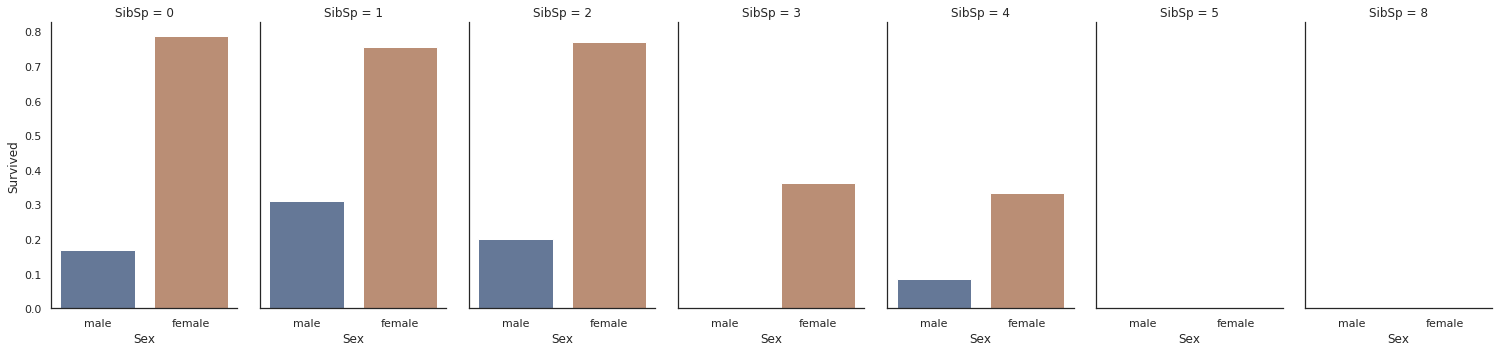

In [26]:
# Relation among SibSP, Gender & Survival Rate
g = sns.catplot(x="Sex", y="Survived", col="SibSp", data=train, saturation=.5, 
                kind="bar", ci=None, aspect=.6)

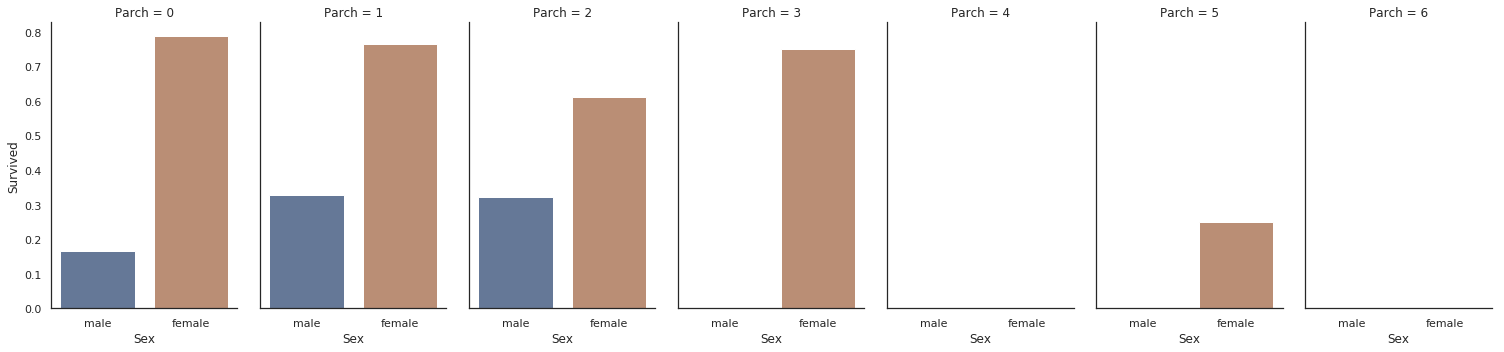

In [27]:
# Relation among Parch, Gender & Survival Rate
g = sns.catplot(x="Sex", y="Survived", col="Parch", data=train, saturation=.5, 
                kind="bar", ci=None, aspect=.6)

**Data preparation including feature engineering**

What we need to do to process following variables  - 

**PassengerID** - No action required

**PClass** - Have only 3 numerical values. We will use it as it is.

**Name** - Can be used to create new variable Title by extracting the salutation from name.

**Sex** - Create dummy variables

**Age** - Missing value treatment, followed by creating dummy variables

**SibSP** - Create dummy variables

**Parch** - Create dummy variables

**Ticket** - Create dummy variables post feature engineering

**Fare** - Missing value treatment followed by log normalization

**Cabin** - Create dummy variables post feature engineering

**Embarked** - Create dummy variables

In [28]:
# Let's combining train & test for quick feature engineering. 
# Variable source is a kind of tag which indicates data source in combined data
train['source']='train'
test['source']='test'
combdata = pd.concat([train, test],ignore_index=True)
print (train.shape, test.shape, combdata.shape)

(891, 13) (418, 12) (1309, 13)


In [29]:
# Let's check the data
combdata.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,source
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,train
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,train
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,train
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,train
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,train


**PassengerID**

In [30]:
# PassengerID - Drop PassengerID
combdata.drop(labels = ["PassengerId"], axis = 1, inplace = True)

**Pclass**

In [31]:
# Pclass - Use as it is
combdata['Pclass'].unique()

array([3, 1, 2])

**Name**

In [32]:
# Name - Extract Salutation from Name variable

salutation = [i.split(",")[1].split(".")[0].strip() for i in combdata["Name"]]
combdata["Title"] = pd.Series(salutation)
combdata["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

**Title**

In [33]:
# Convert other salutations to fixed Title 
combdata["Title"] = combdata["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
combdata["Title"] = combdata["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
combdata["Title"] = combdata["Title"].astype(int)
combdata["Title"].unique()

array([2, 1, 0, 3])

In [34]:
# Drop Name variable
combdata.drop(labels = ["Name"], axis = 1, inplace = True)
combdata.head()

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Ticket,source,Title
0,22.0,NaN,S,7.2500,0,3,male,1,0.0,A/5 21171,train,2
1,38.0,C85,C,71.2833,0,1,female,1,1.0,PC 17599,train,1
2,26.0,NaN,S,7.9250,0,3,female,0,1.0,STON/O2. 3101282,train,1
3,35.0,C123,S,53.1000,0,1,female,1,1.0,113803,train,1
4,35.0,NaN,S,8.0500,0,3,male,0,0.0,373450,train,2


**Age**

In [35]:
# Age

## Fill Age with the median age of similar rows according to Sex, Pclass, Parch and SibSp
# Index of NaN age rows
missing_index = list(combdata["Age"][combdata["Age"].isnull()].index)

for i in missing_index :
    median_age = combdata["Age"].median()
    filled_age = combdata["Age"][((combdata['Sex'] == combdata.iloc[i]["Sex"]) & 
                                (combdata['SibSp'] == combdata.iloc[i]["SibSp"]) & 
                                (combdata['Parch'] == combdata.iloc[i]["Parch"]) & 
                                (combdata['Pclass'] == combdata.iloc[i]["Pclass"]))].median()
    if not np.isnan(filled_age) :
        combdata['Age'].iloc[i] = filled_age
    else :
        combdata['Age'].iloc[i] = median_age

**Sex**

In [36]:
# Sex - Create dummy variables
#combdata["Sex"] = combdata["Sex"].map({"male": 0, "female":1}) or
combdata = pd.get_dummies(combdata, columns = ["Sex"])

**Creating Family Size variable using SibSp & Parch**

In [37]:
# Create a variable representing family size from SibSp and Parch
combdata["Fsize"] = combdata["SibSp"] + combdata["Parch"] + 1

# Create new feature of family size
combdata['Single'] = combdata['Fsize'].map(lambda s: 1 if s == 1 else 0)
combdata['SmallF'] = combdata['Fsize'].map(lambda s: 1 if  s == 2  else 0)
combdata['MedF'] = combdata['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
combdata['LargeF'] = combdata['Fsize'].map(lambda s: 1 if s >= 5 else 0)

,Survived
Fsize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


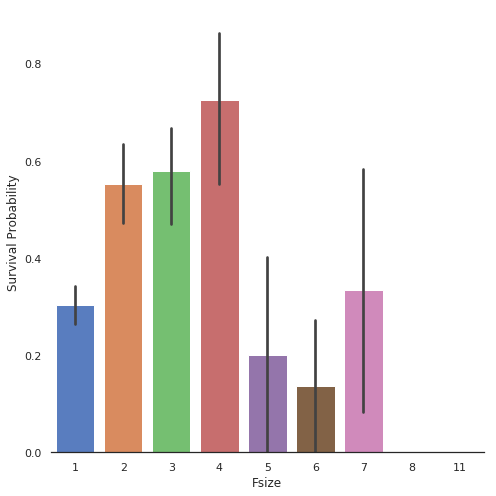

In [38]:
# Analyze the Survival Probability by Fsize

g  = sns.factorplot(x="Fsize",y="Survived",data=combdata,kind="bar", size = 7 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")
combdata[["Fsize", "Survived"]].groupby(['Fsize']).mean().sort_values(by='Survived', ascending=False)

**SibSp**

In [39]:
# SibSp - Create dummy variables
combdata = pd.get_dummies(combdata, columns = ["SibSp"])

**Parch**

In [40]:
# Parch - Create dummy variables
combdata = pd.get_dummies(combdata, columns = ["Parch"])

**Ticket**

In [41]:
# Ticket - Extracting the ticket prefix. This might be a representation of class/compartment.
# If there is no prefix replace with U (Unknown). 

Ticket = []
for i in list(combdata.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0])
    else:
        Ticket.append("U")
        
combdata["Ticket"] = Ticket
combdata["Ticket"].unique()

combdata = pd.get_dummies(combdata, columns = ["Ticket"], prefix="T")

**Fare**

In [42]:
# Fare - Check the number of missing value
combdata["Fare"].isnull().sum()

1

In [43]:
# Only 1 value is missing so we will fill the same with median
combdata["Fare"] = combdata["Fare"].fillna(combdata["Fare"].median())

In [44]:
# Use the numpy fuction log1p which  applies log(1+x) to all elements of the column
combdata["Fare"] = np.log1p(combdata["Fare"])

#Check the new distribution 
# sns.distplot(combdata['Fare'] , fit=norm);

In [45]:
# Cabin - Replace the missing Cabin number by the type of cabin unknown 'U'
combdata["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'U' for i in combdata['Cabin'] ])

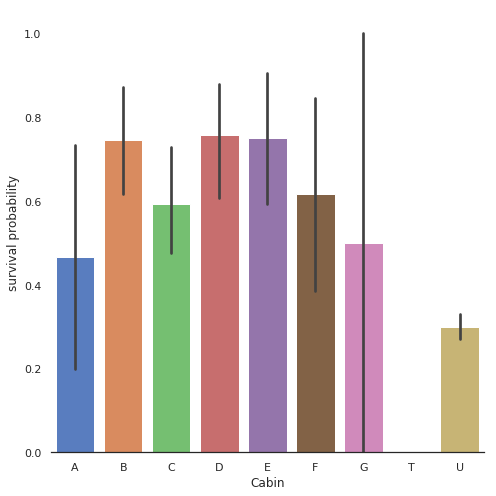

In [46]:
# Let's plot the survival probability by Cabin
g  = sns.factorplot(x="Cabin",y="Survived",data=combdata,kind="bar", size = 7 ,
                    palette = "muted",order=['A','B','C','D','E','F','G','T','U'])
g.despine(left=True)
g = g.set_ylabels("survival probability")

In [47]:
# Create dummy variables
combdata = pd.get_dummies(combdata, columns = ["Cabin"], prefix="Cabin")

**Embarked**

In [48]:
# Embarked - Find the number of missing values
combdata["Embarked"].isnull().sum()

# Fill Embarked missing values of dataset set with mode 'S'
combdata["Embarked"] = combdata["Embarked"].fillna("S")

# Create dummy variables
combdata = pd.get_dummies(combdata, columns = ["Embarked"], prefix="Emb")

**Developing a Neural Network model**

In [49]:
## Separate train dataset and test dataset using the index variable 'source'

train_df = combdata.loc[combdata['source']=="train"]
test_df = combdata.loc[combdata['source']=="test"]
test_df.drop(labels=["Survived"],axis = 1,inplace=True)

train_df.drop(labels=["source"],axis = 1,inplace=True)
test_df.drop(labels=["source"],axis = 1,inplace=True)

test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 75 columns):
Age           418 non-null float64
Fare          418 non-null float64
Pclass        418 non-null int64
Title         418 non-null int64
Sex_female    418 non-null uint8
Sex_male      418 non-null uint8
Fsize         418 non-null int64
Single        418 non-null int64
SmallF        418 non-null int64
MedF          418 non-null int64
LargeF        418 non-null int64
SibSp_0       418 non-null uint8
SibSp_1       418 non-null uint8
SibSp_2       418 non-null uint8
SibSp_3       418 non-null uint8
SibSp_4       418 non-null uint8
SibSp_5       418 non-null uint8
SibSp_8       418 non-null uint8
Parch_0       418 non-null uint8
Parch_1       418 non-null uint8
Parch_2       418 non-null uint8
Parch_3       418 non-null uint8
Parch_4       418 non-null uint8
Parch_5       418 non-null uint8
Parch_6       418 non-null uint8
Parch_9       418 non-null uint8
T_A           418 non-null uin

In [50]:
## Separate train features and label 

train["Survived"] = train["Survived"].astype(int)
Y_train = train["Survived"]
X_train = train_df.drop(labels = ["Survived"],axis = 1)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 75 columns):
Age           891 non-null float64
Fare          891 non-null float64
Pclass        891 non-null int64
Title         891 non-null int64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Fsize         891 non-null int64
Single        891 non-null int64
SmallF        891 non-null int64
MedF          891 non-null int64
LargeF        891 non-null int64
SibSp_0       891 non-null uint8
SibSp_1       891 non-null uint8
SibSp_2       891 non-null uint8
SibSp_3       891 non-null uint8
SibSp_4       891 non-null uint8
SibSp_5       891 non-null uint8
SibSp_8       891 non-null uint8
Parch_0       891 non-null uint8
Parch_1       891 non-null uint8
Parch_2       891 non-null uint8
Parch_3       891 non-null uint8
Parch_4       891 non-null uint8
Parch_5       891 non-null uint8
Parch_6       891 non-null uint8
Parch_9       891 non-null uint8
T_A           891 non-null uint8


In [51]:
import keras 
from keras import backend as k

from keras.callbacks import History 
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense , Embedding, LSTM, Activation     # create layers
from keras.layers.core import Dense
from keras import regularizers

Using TensorFlow backend.


In [52]:
# Initialising the NN
model = Sequential()

In [53]:
# layers
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 75))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', kernel_regularizer =regularizers.l2(0.01)))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', kernel_regularizer =regularizers.l2(0.01)))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = History()
model.fit(X_train, Y_train, batch_size = 40, epochs = 120,validation_split=0.30, callbacks=[history])


Train on 623 samples, validate on 268 samples
Epoch 1/120
623/623 [==============================] - 0s 792us/step - loss: 0.6925 - acc: 0.6051 - val_loss: 0.6905 - val_acc: 0.6418
Epoch 2/120
623/623 [==============================] - 0s 45us/step - loss: 0.6904 - acc: 0.6051 - val_loss: 0.6879 - val_acc: 0.6418
Epoch 3/120
623/623 [==============================] - 0s 45us/step - loss: 0.6886 - acc: 0.6051 - val_loss: 0.6853 - val_acc: 0.6418
Epoch 4/120
623/623 [==============================] - 0s 45us/step - loss: 0.6864 - acc: 0.6051 - val_loss: 0.6814 - val_acc: 0.6418
Epoch 5/120
623/623 [==============================] - 0s 45us/step - loss: 0.6829 - acc: 0.6051 - val_loss: 0.6748 - val_acc: 0.6418
Epoch 6/120
623/623 [==============================] - 0s 45us/step - loss: 0.6770 - acc: 0.6051 - val_loss: 0.6647 - val_acc: 0.6418
Epoch 7/120
623/623 [==============================] - 0s 48us/step - loss: 0.6713 - acc: 0.6051 - val_loss: 0.6573 - val_acc: 0.6418
Epoch 8/120
623

In [54]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

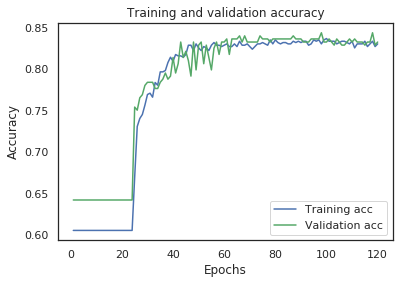

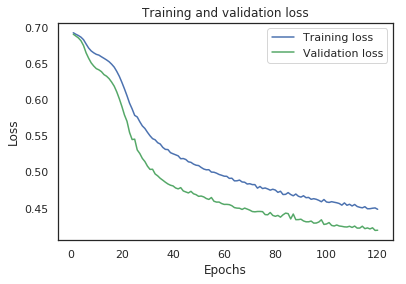

In [55]:
# Plotting Results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title('Training and validation accuracy')
plt.legend()
fig = plt.figure()
fig.savefig('acc.png')


plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')

plt.legend()
plt.show()

From the plot of accuracy we can see that the training the model beyond vertain epoch is not helping much, however, we can also see that the model has not yet over-learned the training dataset, showing comparable skill on both datasets.

From the plot of loss, we can see that the model has comparable performance on both train and validation datasets (labeled test). If these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch.

**Predict using Neural Network**

In [56]:
y_pred = model.predict(test_df)
y_final = (y_pred > 0.5).astype(int).reshape(test_df.shape[0])
output = pd.DataFrame({'PassengerId': IDtest['PassengerId'], 'Survived': y_final})
output.to_csv('Neural Network Prediction.csv', index=False)

The NN needs to be optimized for best results (WIP)

**Conclusion**

Title, Sex_Female, Fare & PClass seems to be common features preferred for classification.

While Title & Age feature represents the Age category of passengers the features like Fare, PClass, Cabin etc. represents the economic status. 

Based on our findings we can conclude that Age, Gender & features representing social/economic status were primary factors affecting the survival of passenger.

**If you like this notebook or find this notebook helpful, Please upvote and/or leave a comment**